In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.fft import fft

In [2]:
import os

# Specify the directory path
directory = 'aug-orginal'

# List all files in the directory
file_list = os.listdir(directory)

# Print the list of files
for filename in file_list:
    print(filename)

.ipynb_checkpoints
augmented_100..wav
augmented_100.wav
augmented_110..wav
augmented_110.wav
augmented_120..wav
augmented_120.wav
augmented_130..wav
augmented_130.wav
augmented_140..wav
augmented_140.wav
augmented_150..wav
augmented_150.wav
augmented_160..wav
augmented_160.wav
augmented_170..wav
augmented_170.wav
augmented_180..wav
augmented_180.wav
augmented_190..wav
augmented_190.wav
augmented_200..wav
augmented_200.wav
augmented_210..wav
augmented_210.wav
augmented_220..wav
augmented_220.wav
augmented_230..wav
augmented_230.wav
augmented_240..wav
augmented_240.wav
augmented_250..wav
augmented_250.wav
augmented_260..wav
augmented_260.wav
augmented_270..wav
augmented_270.wav
augmented_280..wav
augmented_280.wav
augmented_290..wav
augmented_290.wav
augmented_30..wav
augmented_30.wav
augmented_300..wav
augmented_300.wav
augmented_40..wav
augmented_40.wav
augmented_50..wav
augmented_50.wav
augmented_60..wav
augmented_60.wav
augmented_70..wav
augmented_70.wav
augmented_80..wav
augmented_8

In [ ]:
##Labels

In [3]:
import pandas as pd

# Replace 'your_excel_file.xlsx' 
excel_file_path = 'aug-orginal.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)
# Extract the 'Diagnosis' column
y = df['diagnosis']

# Print or use the 'Diagnosis' column as needed
print(y)


0      1
1      1
2      1
3      1
4      1
      ..
223    0
224    0
225    0
226    0
227    0
Name: diagnosis, Length: 228, dtype: int64


In [4]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler

# Specify the directory
directory = 'aug-orginal'

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    # (1) Log-space array from fmin to fmax, to get nbins values
    fmin = 8  # Set fmin to 8 kHz
    fv = np.linspace(fmin, f_vector[len(f_vector) - 1], num=nbins)

    # (2) Map the previous values to the freq. values obtained from the fft
    f_vector_bin = []
    for val in fv:
        nf = f_vector[((f_vector > val))]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[len(f_vector) - 1])

    # (3) Get index of the f_values
    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)

    # (4) Get in the values of the fft in those indices. Sum values within each bin
    return fft_vector_bin, fv

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        # Construct the full file path
        audio_file_path = os.path.join(directory, audio_file)

        # Load the audio file
        audio_signal, sr = librosa.load(audio_file_path, sr=96000)

        # Choose the number of FFT points
        n_fft = 2048

        f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft))

        # Choose the number of bins
        nbins = 1000

        # Now you can use these values in your feature extraction function
        fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)

        # Append features to the list
        X.append(fft_feats)

        # Print the FFT features
        #print("File:", audio_file_path)
        #print("FFT Features:", fft_feats)
        #print("=" * 30)

# Convert the list of features to a numpy array
X = np.array(X)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Now X_normalized contains your normalized feature values
print("X_normalized Shape:", X_normalized.shape)


X_normalized Shape: (228, 999)


# AUTO ML WITH Augmented data

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7314972823538354

Generation 2 - Current best internal CV score: 0.7314972823538354

Generation 3 - Current best internal CV score: 0.742664931606903

Generation 4 - Current best internal CV score: 0.742664931606903

Generation 5 - Current best internal CV score: 0.742664931606903

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.4, min_samples_leaf=2, min_samples_split=7, n_estimators=100)
                         Metric       Value
0            F1 Score Train (%)  100.000000
1             F1 Score Test (%)   66.839149
2       Standard Deviation Test    0.482687
3  False Positive Rate Test (%)   20.833333
4  False Negative Rate Test (%)   45.454545


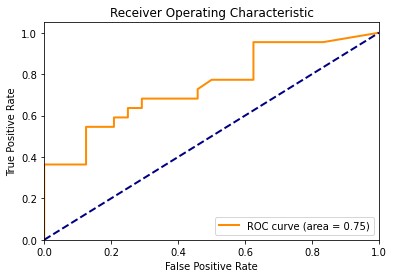

In [6]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, roc_auc_score
import pandas as pd
from tpot import TPOTClassifier
import matplotlib.pyplot as plt

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    fmin = 0  # Set fmin to 0 kHz
    fv = np.linspace(fmin, f_vector[len(f_vector) - 1], num=nbins)

    f_vector_bin = []
    for val in fv:
        nf = f_vector[((f_vector > val))]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[len(f_vector) - 1])

    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)

    return fft_vector_bin, fv

# Load the Excel file
excel_file_path = 'aug-orginal.xlsx'
df = pd.read_excel(excel_file_path)
y = df['diagnosis']

# Specify the directory
directory = 'aug-orginal'

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        audio_file_path = os.path.join(directory, audio_file)
        audio_signal, sr = librosa.load(audio_file_path, sr=96000)
        n_fft = 2048
        f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft, dtype=np.complex128))
        nbins = 1000
        fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)
        X.append(fft_feats)

X = np.array(X)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=96000)

# Initialize TPOT
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=50, random_state=96000, scoring='f1_weighted')

# Fit TPOT on training data
tpot.fit(X_train, y_train)

# Predict on the training set
y_train_pred = tpot.predict(X_train)

# Predict on the test set
y_test_pred = tpot.predict(X_test)
y_test_pred_proba = tpot.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Evaluate the model
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

conf_matrix_test = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix_test.ravel()
fpr_test = fp / (fp + tn)
fnr_test = fn / (fn + tp)

std_dev_test = np.std(y_test_pred)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    "Metric": ["F1 Score Train (%)", "F1 Score Test (%)", "Standard Deviation Test", "False Positive Rate Test (%)", "False Negative Rate Test (%)"],
    "Value": [f1_train * 100, f1_test * 100, std_dev_test, fpr_test * 100, fnr_test * 100]
})

# Export the best pipeline
tpot.export('best_pipeline.py')

# Display the DataFrame
print(metrics_df)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [5]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    # Removed fmin
    fv = np.linspace(f_vector[0], f_vector[len(f_vector) - 1], num=nbins)

    f_vector_bin = []
    for val in fv:
        nf = f_vector[((f_vector > val))]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[len(f_vector) - 1])

    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)

    return fft_vector_bin, fv

# Lists to store features
X = []

# Specify the directories for the two datasets
directories = ['augmented-audio', 'audio-new']

# Iterate through audio files in each directory
for directory in directories:
    for audio_file in os.listdir(directory):
        if audio_file.endswith('.wav'):
            # Construct the full file path
            audio_file_path = os.path.join(directory, audio_file)

            # Load the audio file
            audio_signal, sr = librosa.load(audio_file_path, sr=96000)

            # Choose the number of FFT points
            n_fft = 2048

            f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft))

            # Choose the number of bins
            nbins = 1000

            # Feature extraction
            fft_feats, _ = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)

            # Append features to the list
            X.append(fft_feats)

# Convert the list of features to a numpy array
X = np.array(X)

# Now X contains your feature values
print("X Shape:", X.shape)

# Load the labels from the Excel files
df_augmented = pd.read_excel('augumented-audio.xlsx')
y_augmented = df_augmented['diagnosis']
df_new = pd.read_excel('audio-new.xlsx')
y_new = df_new['diagnosis']

# Combine the labels
y = pd.concat([y_augmented, y_new], ignore_index=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96000)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [5, 10, 15],
    'max_leaf_nodes': [10, 15, 20]
}

# Create the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=96000)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=96000)
best_model.fit(X_train, y_train)

# Evaluate training F1 score
train_f1 = f1_score(y_train, best_model.predict(X_train), average='macro')
print('Training F1 Score:', train_f1)

# Evaluate validation F1 score
val_f1 = f1_score(y_test, best_model.predict(X_test), average='macro')
print('Validation F1 Score:', val_f1)

# Evaluate testing F1 score
test_f1 = f1_score(y_test, best_model.predict(X_test), average='macro')
print('Testing F1 Score:', test_f1)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'augmented-audio'